In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Вариант 2
Вычисляем
$$
\int_{a}^{b} \frac{f(x)}{(x-a)^{\alpha}(b-x)^{\beta}} d x
$$
где 
$$
\begin{array}{c}
f(x)=3 \cos (\frac{x}{2}) \exp (\frac{x}{4})+5 \sin (\frac{5x}{2}) \exp (- \frac{x}{3})+2 x \\
a=1.7, b=3.2, \alpha=0, \beta=1 / 4
\end{array}
$$

In [3]:
def F(x, a=1.7, b=3.2, alpha=0, beta=0.25):
    f = 3 * np.cos(2 * x) * np.exp(2 * x / 3) + 5 * np.sin(2.5 * x) * np.exp(-x / 3) + 2 * x
    p = (x - a) ** alpha * (b - x) ** beta
    return f / p

1) Вычислим интеграл, используя следующее приближение

$$
J(F)=\int_{a}^{b} F(x) d x \approx \sum_{i=1}^{n} F\left(\xi_{i}\right) \Delta x_{i}=h \sum_{i=1}^{n} F\left(a+\left(i-\frac{1}{2}\right) h\right)
$$

In [4]:
def MPRule(f, n, a=1.7, b=3.2, alpha=0, beta=0.25):
    params = (a, b, alpha, beta)
    h = (b - a) / n
    x = np.linspace(a + h/2, b - h/2, n)
    Sum = sum(f(x)) * h

    return Sum

<Figure size 432x288 with 0 Axes>

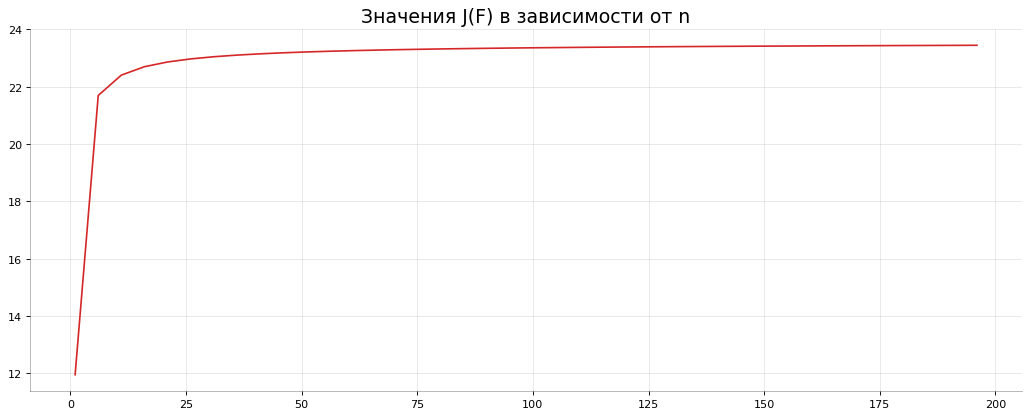

In [5]:
max_n = 200 
y = np.zeros(max_n // 5)

for i, n in enumerate(range(1, max_n, 5)):
    y[i] = MPRule(F, n)

fig = plt.figure()
plt.figure(figsize=(16,6), dpi= 80)
plt.title("Значения J(F) в зависимости от n", fontsize=17)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)
plt.grid(axis='both', alpha=.3)

plt.plot([i for i in range(1, max_n, 5)], y, color='tab:red');
plt.show();

2) 
$$
\int_{a}^{b} p(x) f(x) d x \approx \sum_{i=1}^{n} A_{i} f\left(x_{i}\right)
$$
$$p = (b - x)^{-\frac{1}{4}}$$
$$
\mu_{k}=\int_{a}^{b} p(x) x^{k} d x
$$
Введем замену переменной $t = b - x$. \
Тогда задача сведется к следующей.
$$
\int_{a}^{b} p(x) f(x) d x \approx \sum_{i=1}^{n} A_{i} f\left(b - t_{i}\right)
$$
$$
p(t)= t^{-\frac{1}{4}}
$$
$$\mu_i = \int_{0}^{b-a} t^{-\frac{1}{4}} \cdot t^{i} dt = \frac{1}{i+1-\frac{1}{4}}(b-a)^{i+1-\frac{1}{4}}$$
Находим $\mu_i$ при $b=3.2$

$$\mu_0 = \frac{4}{3}(3.2)^\frac{3}{4}\\
\mu_1 = \frac{4}{7}(3.2)^\frac{7}{4}\\
\mu_2 = \frac{4}{11}(3.2)^\frac{11}{4}\\
\mu_3 = \frac{4}{14}(3.2)^\frac{14}{4}$$